In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
import pandas as pd
df = pd.read_csv('sample_data.csv')
df = df.groupby(["device_id"]).aggregate({'timestamp': "nunique", #'host' : "nunique", 'host_ip' : "nunique" ,
                                                'port_dst' : "nunique", #'transport_protocol' : "nunique",
                                                 'service_device_id' : "nunique", 'packets_count' : "sum",
                                                 'packet_loss' : "sum",
                                                 'retransmit_count': "sum", 'latency' : "sum",
                                                 'session_count' : "sum",# 'outbound_bytes_max' :"sum",
                                                 #'inbound_bytes_mean' : "sum",
                                                 'outbound_packet_size_max' : "sum", 'inbound_packet_size_max' : "sum"  }) 
print(df.info())


Index(['network_id', 'device_id', 'timestamp', 'port_dst', 'UDP', 'TCP',
       'service_device_id', 'packets_count', 'outbound_bytes_count',
       'inbound_bytes_count', 'packet_loss', 'retransmit_count', 'latency',
       'session_count', 'outbound_packets_count', 'inbound_packets_count',
       'outbound_bytes_max', 'outbound_bytes_min', 'outbound_bytes_mean',
       'outbound_bytes_median', 'outbound_bytes_stddev', 'inbound_bytes_max',
       'inbound_bytes_min', 'inbound_bytes_mean', 'inbound_bytes_median',
       'inbound_bytes_stddev', 'outbound_packet_size_max',
       'outbound_packet_size_min', 'outbound_packet_size_mean',
       'outbound_packet_size_median', 'outbound_packet_size_stddev',
       'inbound_packet_size_max', 'inbound_packet_size_min',
       'inbound_packet_size_mean', 'inbound_packet_size_median',
       'inbound_packet_size_stddev'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271 entries, 35 to 1744504
Data columns (total 6 col

In [0]:
# We use the simple min-max normalization in order to normalize the confidence values to 0-1 range.
# Higher score means that this device is probably more anomalous.
def calc_normalized_decision(decision_function_result):
    decision_function_result *= -1
    minimum = decision_function_result.min()
    maximum = decision_function_result.max()
    return (decision_function_result - minimum) / (maximum - minimum)

In [0]:
import numpy as np
# fit the model
clf = IsolationForest(behaviour='new', max_samples=100,
                      random_state=rng, contamination=0.01)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
#y_pred_test = clf.predict(X_test)
#y_pred_outliers = clf.predict(X_outliers)
uniqueValues, occurCount = np.unique(y_pred_train, return_counts=True)
 
print("Unique Values : " , uniqueValues)
print("Occurrence Count : ", occurCount)
print(y_pred_train[10:30])
b = clf.decision_function(X_train)
#b = np.apply_along_axis(calc_normalized_decision, 0, b)
print(calc_normalized_decision(b[10:30]))

Unique Values :  [-1  1]
Occurrence Count :  [  15 1485]
[ 1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1]
[2.58523369e-01 1.23034417e-01 1.23848565e-02 4.58033251e-01
 0.00000000e+00 3.29127101e-01 6.24434456e-01 1.51324882e-03
 2.20907634e-01 1.00000000e+00 9.81285363e-03 5.98023231e-02
 3.55370207e-01 1.56926143e-04 2.15781851e-02 1.42593285e-01
 2.13731034e-01 1.13014270e-02 2.15781851e-02 2.99125334e-01]


1485


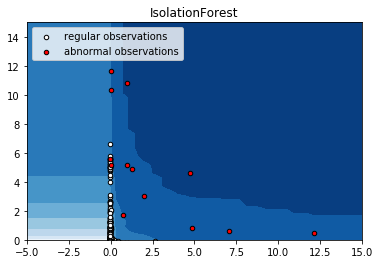

In [0]:
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 15, 50), np.linspace(0,15, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)
condition = (y_pred_train == 1)
x_filtered = np.extract(condition, X_train[:, 0])
y_filtered = np.extract(condition, X_train[:, 1])
print(len(x_filtered))
b1 = plt.scatter(x_filtered, y_filtered, c='white',
                 s=20, edgecolor='k')
condition = (y_pred_train == -1)
x_filtered = np.extract(condition, X_train[:, 0])
y_filtered = np.extract(condition, X_train[:, 1])
b2 = plt.scatter(x_filtered, y_filtered, c='red',
                 s=20, edgecolor='k')
#c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
#                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 15))
plt.ylim((0, 15))
plt.legend([b1,b2],
           [ "regular observations", "abnormal observations"],
           loc="upper left")
plt.show()

**כל הכבוד למאור התותח**